<a href="https://colab.research.google.com/github/october-9th/Reinforcement-Learning-Routing-Protocol/blob/main/RLOR_(completed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import thư viện cần thiết**

In [ ]:
import numpy as np
import random
import sys
import math
import pandas as pd
import time
import matplotlib.pyplot as plt
import csv

# **Khởi tạo các tham số đầu vào của môi trường**

In [ ]:
max_commnunication_range = 250 # Ngưỡng giao tiếp tối đa của các node
max_depth = 500 # Độ sâu tối đa
sink = {"x": 500, "y": 500, "z": 0} # Thông tin node sink
total_nodes = []
sink_communication_range = 200 # Ngưỡng giao tiếp của node sink

# **Khởi tạo mảng seabed node và chọn cluster head**


In [ ]:
# HÀM KHỞI TẠO MẢNG SEADBED_NODES
def initialy_seabed_nodes(num_seabed, max_depth):
  seabed_nodes = []
  for i in range(num_seabed):
        # Generate random x, y coordinates
        x = random.randint(0, max_depth)
        y = random.randint(0, max_depth)
        # Generate random energy
        energy = random.uniform(1, 5)
        # Create seabed node with fixed z-coordinate
        seabed_node = {"id": i, "x": x, "y": y, "z": -500, "energy" : energy}
        seabed_nodes.append(seabed_node)
  return seabed_nodes

In [ ]:
# Khai báo số lượng seabed_nodes
# num_seabed = int(input("Nhập số lượng node seabed: "))
num_seabed = 200

# Gọi hàm
seabed_nodes = initialy_seabed_nodes(num_seabed, max_depth)
seabed_nodes

[{'id': 0, 'x': 346, 'y': 457, 'z': -500, 'energy': 3.111413395438161},
 {'id': 1, 'x': 324, 'y': 269, 'z': -500, 'energy': 4.460713318970678},
 {'id': 2, 'x': 268, 'y': 388, 'z': -500, 'energy': 2.1558573913284462},
 {'id': 3, 'x': 2, 'y': 127, 'z': -500, 'energy': 3.3040879759592094},
 {'id': 4, 'x': 61, 'y': 103, 'z': -500, 'energy': 1.4936606496625697},
 {'id': 5, 'x': 336, 'y': 183, 'z': -500, 'energy': 2.0280854721561803},
 {'id': 6, 'x': 71, 'y': 239, 'z': -500, 'energy': 4.546090975110008},
 {'id': 7, 'x': 27, 'y': 304, 'z': -500, 'energy': 4.234481944392069},
 {'id': 8, 'x': 98, 'y': 378, 'z': -500, 'energy': 2.1792737110983014},
 {'id': 9, 'x': 340, 'y': 66, 'z': -500, 'energy': 1.618413298178666},
 {'id': 10, 'x': 214, 'y': 174, 'z': -500, 'energy': 2.0368758659666097},
 {'id': 11, 'x': 441, 'y': 433, 'z': -500, 'energy': 4.066533545244676},
 {'id': 12, 'x': 434, 'y': 336, 'z': -500, 'energy': 3.815319603609103},
 {'id': 13, 'x': 224, 'y': 107, 'z': -500, 'energy': 1.2752767

In [ ]:
# HÀM TÌM NODE CLUSTER HEAD CỦA SEABED_NODE
def find_cluster_head(seabed_nodes, min_energy):
    # Tạo danh sách tọa độ và năng lượng của các node
    node_coordinates = [(node['x'], node['y'], node['z']) for node in seabed_nodes]
    node_ids = [node['id'] for node in seabed_nodes]
    node_energy = [node['energy'] for node in seabed_nodes]

    # Lọc ra các node có năng lượng đủ điều kiện
    filtered_nodes = [node for node, energy in zip(seabed_nodes, node_energy) if energy >= min_energy]
    filtered_coordinates = [(node['x'], node['y'], node['z']) for node in filtered_nodes]
    filtered_ids = [node['id'] for node in filtered_nodes]
    filtered_energy = [node['energy'] for node in filtered_nodes]

    # Nếu không có node nào đủ năng lượng, trả về None
    if not filtered_nodes:
        return None, None, None

    # Khởi tạo centroid ngẫu nhiên
    centroid = random.choice(filtered_coordinates)

    # Lặp cho đến khi centroid không thay đổi
    for _ in range(100):
        cluster = filtered_coordinates.copy()
        new_centroid = tuple(sum(coord) / len(cluster) for coord in zip(*cluster))
        if new_centroid == centroid:
            break
        centroid = new_centroid

    # Tính khoảng cách từ mỗi node đến centroid
    distances = [(math.sqrt((node[0] - centroid[0])**2 + (node[1] - centroid[1])**2 + (node[2] - centroid[2])**2), node_id, energy) for node, node_id, energy in zip(filtered_coordinates, filtered_ids, filtered_energy)]
    # Tìm node có khoảng cách nhỏ nhất đến centroid làm cluster head
    if distances:
        cluster_head_distance, cluster_head_id, cluster_head_energy = min(distances, key=lambda x: x[0])
        return cluster_head_id, cluster_head_energy, cluster_head_distance
    else:
        return None, None, None

# Gọi hàm
min_energy = 2  # Đặt ngưỡng năng lượng tối thiểu
cluster_head_id, cluster_head_energy, cluster_head_distance = find_cluster_head(seabed_nodes, min_energy)

if cluster_head_id is not None:
    # In ra thông tin của cluster head
    cluster_head_node = [node for node in seabed_nodes if node['id'] == cluster_head_id][0]
    print(f"Cluster Head: Node {cluster_head_id} with coordinates ({cluster_head_node['x']}, {cluster_head_node['y']}, {cluster_head_node['z']}) and energy {cluster_head_energy}")
else:
    print("Không tìm thấy node cluster head phù hợp.")

Cluster Head: Node 104 with coordinates (233, 238, -500) and energy 3.3653800840389687


# **Khởi tạo mảng forwarder node**

In [ ]:
# HÀM KHỞI TẠO MẢNG FORWARDER_NODES
def initialy_forwarder_nodes(cluster_head_node, num_forwarder, max_depth):
  forwarder_nodes = []
  # gán phần tử đầu tiên là cluster_head
  cluster_head_node['id'] = 1
  forwarder_nodes.append(cluster_head_node)
  for i in range(2, num_forwarder + 2):
        # Generate random x, y coordinates
        x = random.randint(0, max_depth)
        y = random.randint(0, max_depth)
        # Generate random energy
        energy = random.uniform(2, 2.5)
        # Generate random z-coordinate for forwarder node
        z_forwarder = random.randint(100, 500)
        # Create forwarder node
        forwarder_node = {"id": i, "x": x, "y": y, "z": -z_forwarder, "energy": energy}
        forwarder_nodes.append(forwarder_node)
  return forwarder_nodes

In [ ]:
# Khai báo số lượng node forwarder
# num_forwarder = int(input("Nhập số lượng node forwarder: "))
num_forwarder = 50
max_depth = 1000

# Gọi hàm
forwarder_nodes = initialy_forwarder_nodes(cluster_head_node, num_forwarder, max_depth)

In [ ]:
forwarder_nodes

[{'id': 1, 'x': 233, 'y': 238, 'z': -500, 'energy': 3.3653800840389687},
 {'id': 2, 'x': 63, 'y': 260, 'z': -212, 'energy': 2.3861356922260852},
 {'id': 3, 'x': 690, 'y': 620, 'z': -192, 'energy': 2.1147952088806132},
 {'id': 4, 'x': 308, 'y': 320, 'z': -440, 'energy': 2.1632795556485895},
 {'id': 5, 'x': 320, 'y': 869, 'z': -323, 'energy': 2.30721724771031},
 {'id': 6, 'x': 47, 'y': 841, 'z': -260, 'energy': 2.0798758100170716},
 {'id': 7, 'x': 14, 'y': 945, 'z': -322, 'energy': 2.4302972974347217},
 {'id': 8, 'x': 384, 'y': 698, 'z': -391, 'energy': 2.0984139764796317},
 {'id': 9, 'x': 151, 'y': 692, 'z': -337, 'energy': 2.4634156287743685},
 {'id': 10, 'x': 55, 'y': 114, 'z': -200, 'energy': 2.033924584216782},
 {'id': 11, 'x': 977, 'y': 769, 'z': -209, 'energy': 2.4808103659706164},
 {'id': 12, 'x': 540, 'y': 845, 'z': -353, 'energy': 2.2539652935127616},
 {'id': 13, 'x': 541, 'y': 337, 'z': -180, 'energy': 2.4871944240810917},
 {'id': 14, 'x': 510, 'y': 318, 'z': -496, 'energy': 2

In [ ]:
# Tìm node sâu nhất và cao nhất
for node in forwarder_nodes:
  distance_at_node = np.sqrt((node['x'] - sink['x'])**2 + (node['y'] - sink['y'])**2 + (node['z'] - sink['z'])**2)
  if distance_at_node <= sink_communication_range:
    highest = node
deepest = forwarder_nodes[np.argmin(np.array([node['z'] for node in forwarder_nodes]))]

print(f"Deepest Forwarder Node: ID = {deepest['id']}, x = {deepest['x']}, y = {deepest['y']}, z = {deepest['z']}, Energy= {deepest['energy']}")
print(f"Highest Forwarder Node: ID = {highest['id']}, x = {highest['x']}, y = {highest['y']}, z = {highest['z']}, Energy= {highest['energy']}")

Deepest Forwarder Node: ID = 1, x = 233, y = 238, z = -500, Energy= 3.3653800840389687
Highest Forwarder Node: ID = 14, x = 522, y = 360, z = -116, Energy= 2.4063464581199536


# **Khởi tạo tập node lân cận cho các node**

In [ ]:
# Khai báo bán kính giao tiếp dựa trên khoảng cách euclidean
threshold_range = max_commnunication_range

# Lập tập node lân cận
neighbors = {node['id']: [] for node in forwarder_nodes}
num_node = len(forwarder_nodes)
for i in range(num_node):
  first_node = forwarder_nodes[i]
  for j in range(num_node):
    if i != j:
      second_node = forwarder_nodes[j]
      dist = np.sqrt((first_node['x'] - second_node['x']) ** 2 + (first_node['y'] - second_node['y']) ** 2 + (first_node['z'] - second_node['z']) ** 2)
      if dist <= threshold_range:
        neighbors[first_node['id']].append(second_node['id'])
        neighbors[second_node['id']].append(first_node['id'])
    else:
      break
for i in range(num_node):
  print(f'node id {forwarder_nodes[i]["id"]} have neighbor: {neighbors[i+1]}\n')

node id 1 have neighbor: [4, 15, 19, 42, 49]

node id 2 have neighbor: [10, 28, 50]

node id 3 have neighbor: [17, 43, 45, 46]

node id 4 have neighbor: [1, 14, 15, 18, 19, 34, 37, 42, 44, 49]

node id 5 have neighbor: [8, 9, 12, 21, 27, 29, 33, 35, 46]

node id 6 have neighbor: [7, 9, 25, 33, 35]

node id 7 have neighbor: [6, 25, 33]

node id 8 have neighbor: [5, 9, 12, 22, 23, 29, 34, 36, 41, 46]

node id 9 have neighbor: [5, 6, 8, 23, 29, 31, 35, 41]

node id 10 have neighbor: [2, 28, 47, 50]

node id 11 have neighbor: [32]

node id 12 have neighbor: [5, 8, 17, 22, 27, 29, 46]

node id 13 have neighbor: [20, 37, 38, 44]

node id 14 have neighbor: [4, 18, 19, 24, 26, 38, 44]

node id 15 have neighbor: [1, 4, 19, 42, 47, 49]

node id 16 have neighbor: [37, 49]

node id 17 have neighbor: [3, 12, 27, 43, 45, 46]

node id 18 have neighbor: [4, 14, 20, 24, 34, 36, 37, 38, 44]

node id 19 have neighbor: [1, 4, 14, 15, 26, 42, 44, 47, 49]

node id 20 have neighbor: [13, 18, 37, 38, 44]

nod

In [ ]:
# Vòng lặp duyệt forwarder_nodes vào mảng neighbors
for node in forwarder_nodes:
    node['neighbors'] = neighbors[node['id']]

# **Thuật toán Qlearning**

# **Lấy thông số, file chính**

In [ ]:
# KHAI BÁO THAM SỐ CHUNG
total_packet = 100 # tổng số gói
sound_wave_speed  = 1447 # tốc độ sóng âm (m/s)
packet_size = 128 # kích thước gói tin (bit)
network_frequency = 25000 # tần số sóng mạng (hz)
flow_rate = 4.5 # tốc độ dòng chảy (m/s)
spreading_coefficient = 1.5 # hệ số lan truyền  (m/s)
backoff_time = 1 # average value for the range provided - thoi gian cho va thu lai (s)
data_rate = 1000 # tỉ lệ khởi tạo dữ liệu (10 kbps)
packet_arrival_rate = 0.1 # packet per second

In [ ]:
# KHAI BÁO THAM SỐ NĂNG LƯỢNG
energy_consume_per_bit = 1 * 10 ** -10 # 100 picojun / bit /m2
energy_dissipated_per_bit = 5 * 10 ** -8 # 50 nanojun / bit
energy_received = packet_size * 8 * energy_consume_per_bit

In [ ]:
# Tham số năng lượng dựa theo công thức của thày Minh
P_tx = 2 # công suất phát (w)
P_rx = 0.1 # công suất thu (w)

In [ ]:
# '''
# chỉnh sửa hàm reward, epsilon - greedy
# chiến thuật triển khai Q learning theo phương pháp epsilon-greedy, sử dụng cơ chế random để đưa ra sự lựa chọn cho node tiếp theo
# 1. phương pháp lựa chọn node
#  - chọn theo hướng khám phá (exploration): dùng biến epsilon để tạo điểm tham chiếu, random lựa chọn node tiếp theo bất kì trong tập node lân cận
#  - chọn theo hướng khai thác (exploitation): giá trị random vượt quá điểm tham chiếu, lựa chọn node có giá trị Q cao nhất nhưng chưa xuất hiện trong tập node lân cận
# 2. cập nhật giá trị Q tại mỗi lần tìm được node khả thi
# -> phương pháp epsilon greedy cân bằng giữa việc khám phá và khai thác, khám phá các đường đi khả thi và khai thác, tránh rơi vào local optimal
# '''

# # test
# test = []

# # Khai báo đầu vào
# nodes = forwarder_nodes
# # Khai báo node bắt đầu đưa gói tin và đích đến
# start_node = nodes[0]
# destination_node = highest

# # Khai báo tham số thuật toán
# gamma = 0.5  # Discount factor
# alpha = 0.5  # Learning rate
# epsilon = 0.8 # Initial exploration rate

# # Khởi tạo giá trị Q
# q_table = np.random.rand(len(nodes), len(nodes)) * 0.1  # Initialize Q-table with small random values

# # Hàm tính trung bình năng lượng còn lại của các node truyền
# def average_residual_energy_ps(energy_cost_to_transmit, neighbors):
#     if len(neighbors) == 0: return 0
#     sum_e = 0
#     for id in neighbors:
#       node = forwarder_nodes[id-1]
#       sum_e += node['energy'] - energy_cost_to_transmit
#     return sum_e / len(neighbors)

# # Hàm tính trung bình năng lượng còn lại của các node nhận
# def average_residual_energy_pr(neighbors):
#     if len(neighbors) == 0: return 0
#     sum_e = 0
#     for id in neighbors:
#       node = forwarder_nodes[id-1]
#       sum_e += node['energy'] - energy_received
#     return sum_e / len(neighbors)

# # Hàm reward
# def reward(current_node, next_node, energy_consumption):
#     P_s = 1/len(current_node['neighbors'])
#     C_ps = 1 - (current_node['energy'] - energy_consumption / current_node['energy'])
#     C_pr = 1 - (current_node['energy'] - energy_received / next_node['energy'])
#     G_ps = 2 / math.pi * math.atan((current_node['energy'] - energy_consumption) - average_residual_energy_ps(energy_consumption, current_node['neighbors']))
#     G_pr = 2 / math.pi * math.atan((current_node['energy'] - energy_received) - average_residual_energy_pr(next_node['neighbors']))
#     Ras_pspr = - (-1) - 0.1 * (C_ps + C_pr) + 0.01 * (G_ps + G_pr)
#     return P_s * Ras_pspr

# # HÀM ÁP DỤNG Q_learning
# invalid_nodes = set()  # tập lưu trữ node không khả thi để chuyển tiếp (node lân cận đã được duyệt qua hết hoặc tập lân cận rỗng)
# visited = set([start_node['id']])
# rollback = set()
# test = 0
# def q_learning(start_node, destination_node):
#     current_node = start_node
#     path = []
#     iterations = 0
#     max_iterations = 1000000 # model - free train 1000 lần
#     number_of_rollback_trigger = 0
#     node_stack = [start_node]

#     while current_node != destination_node and iterations < max_iterations:
#         # lựa chọn node tiếp theo thông qua phương pháp epsilon-greedy
#         if random.random() < epsilon:
#             # Explore: chọn node random trong tập node lân cận
#             available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in visited and node['id'] not in invalid_nodes and node['z'] > current_node['z']]
#             if available_neighbors:
#                 next_node = random.choice(available_neighbors)
#                 # print(f'current node with id: {current_node["id"]} random select next node with id: {next_node["id"]}')
#                 visited.add(next_node['id'])
#             else:
#                 # cơ chế roll back
#                 if path:
#                     number_of_rollback_trigger+=1
#                     rollback.add(current_node['id'])
#                     # print(f'trigger roll back at node with id: {current_node["id"]}')
#                     # node vừa rồi được đánh dấu là node không khả thi để chuyển tiếp
#                     invalid_nodes.add(current_node['id'])
#                     next_node = nodes[path.pop()-1]
#                     # chọn node khcs trong tập lân cận
#                     current_node = next_node
#                     continue
#                 else:
#                     # dừng thuật toán nếu toàn bộ node lân cận đã đi qua
#                     break
#         else:
#             # Exploit: chọn node có giá trị Q cao nhất mà chưa xuất hiện trong tập visited
#             available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in visited and node['id'] not in invalid_nodes and node['z'] > current_node['z']]
#             # available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in invalid_nodes]
#             if available_neighbors:
#                 available_neighbors.sort(key=lambda x: q_table[current_node['id'] - 1, x['id'] - 1], reverse=True)
#                 next_node = available_neighbors[0]
#                 # print(f'current node with id: {current_node["id"]} maximum Q select next node with id: {next_node["id"]}')
#                 visited.add(next_node['id'])
#             else:
#                 # tương tự trên
#                 if path:
#                     number_of_rollback_trigger+=1
#                     rollback.add(current_node['id'])
#                     # print(f'trigger roll back at node with id: {current_node["id"]}')
#                     # node vừa rồi được đánh dấu là node không khả thi để chuyển tiếp
#                     invalid_nodes.add(current_node['id'])
#                     next_node = nodes[path.pop()-1]
#                     # chọn node khcs trong tập lân cận
#                     current_node = next_node
#                     continue
#                 else:
#                     # dừng thuật toán nếu toàn bộ node lân cận đã đi qua
#                     break

#         # tính năng lượng và khoảng cách truyền gói tin
#         transmission_distance = np.sqrt((current_node['x'] - next_node['x']) ** 2 + (current_node['y'] - next_node['y']) ** 2 + (current_node['z'] - next_node['z']) ** 2)
#         energy_cost_to_transmit = packet_size * (energy_consume_per_bit + energy_dissipated_per_bit * transmission_distance**2)
#         # cập nhật giá trị Q
#         q_table[current_node['id'] - 1, next_node['id'] - 1] = (alpha) * q_table[current_node['id'] - 1, next_node['id'] - 1] + \
#                                                                alpha * (reward(current_node, next_node, energy_cost_to_transmit) + gamma * max(q_table[next_node['id'] - 1, :]))

#         # di chuyển tới node tiếp theo và cập nhật hướng di chuyển
#         path.append(current_node['id'])
#         current_node = next_node
#         iterations += 1

#         if next_node == destination_node:
#           path.append(next_node['id'])

#     return path, number_of_rollback_trigger

# # Chạy thuật toán
# min_hop = len(nodes)
# optimal_policy = []
# val = 600
# for i in range(100000):
#   optimal_path_epsilon_greedy, num = q_learning(start_node, destination_node)
#   current_hop = len(optimal_path_epsilon_greedy)
#   if optimal_path_epsilon_greedy and  current_hop + num <= min_hop + val :
#     optimal_policy = optimal_path_epsilon_greedy
#     min_hop = current_hop
#     val = num
# print(f'Best path: {" -> ".join(str(node_id) for node_id in optimal_policy)}')
# print(f'Minimum hop count: {min_hop}')
# print(f'number of roll back being trigger: {val}')

In [ ]:
'''
chỉnh sửa hàm reward, epsilon - greedy
chiến thuật triển khai Q learning theo phương pháp epsilon-greedy, sử dụng cơ chế random để đưa ra sự lựa chọn cho node tiếp theo
1. phương pháp lựa chọn node
 - chọn theo hướng khám phá (exploration): dùng biến epsilon để tạo điểm tham chiếu, random lựa chọn node tiếp theo bất kì trong tập node lân cận
 - chọn theo hướng khai thác (exploitation): giá trị random vượt quá điểm tham chiếu, lựa chọn node có giá trị Q cao nhất nhưng chưa xuất hiện trong tập node lân cận
2. cập nhật giá trị Q tại mỗi lần tìm được node khả thi
-> phương pháp epsilon greedy cân bằng giữa việc khám phá và khai thác, khám phá các đường đi khả thi và khai thác, tránh rơi vào local optimal
'''

# Khai báo đầu vào
nodes = forwarder_nodes
# Khai báo node bắt đầu đưa gói tin và đích đến
start_node = nodes[0]
destination_node = highest

# Khai báo tham số thuật toán
gamma = 0.5  # Discount factor
alpha = 0.5  # Learning rate
epsilon = 0.7 # Initial exploration rate

# Khởi tạo giá trị Q
q_table = np.random.rand(len(nodes), len(nodes)) * 0.1  # Initialize Q-table with small random values

# Hàm tính trung bình năng lượng còn lại của các node truyền
def average_residual_energy_ps(energy_cost_to_transmit, neighbors):
    if len(neighbors) == 0: return 0
    sum_e = 0
    for id in neighbors:
      node = forwarder_nodes[id-1]
      sum_e += node['energy'] - energy_cost_to_transmit
    return sum_e / len(neighbors)

# Hàm tính trung bình năng lượng còn lại của các node nhận
def average_residual_energy_pr(neighbors):
    if len(neighbors) == 0: return 0
    sum_e = 0
    for id in neighbors:
      node = forwarder_nodes[id-1]
      sum_e += node['energy'] - energy_received
    return sum_e / len(neighbors)

# Hàm reward
def reward(current_node, next_node, energy_consumption):
    P_s = 1/len(current_node['neighbors'])
    C_ps = 1 - (current_node['energy'] - energy_consumption / current_node['energy'])
    C_pr = 1 - (current_node['energy'] - energy_received / next_node['energy'])
    G_ps = 2 / math.pi * math.atan((current_node['energy'] - energy_consumption) - average_residual_energy_ps(energy_consumption, current_node['neighbors']))
    G_pr = 2 / math.pi * math.atan((current_node['energy'] - energy_received) - average_residual_energy_pr(next_node['neighbors']))
    Ras_pspr = - (-1) - 0.1 * (C_ps + C_pr) + 0.01 * (G_ps + G_pr)
    return P_s * Ras_pspr

# HÀM ÁP DỤNG Q_learning
invalid_nodes = set()  # tập lưu trữ node không khả thi để chuyển tiếp (node lân cận đã được duyệt qua hết hoặc tập lân cận rỗng)
visited = set([start_node['id']])
rollback = set()

def q_learning(start_node, destination_node):
    current_node = start_node
    path = []
    iterations = 0
    max_iterations = 1000000 # model - free train 1000 lần
    number_of_rollback_trigger = 0
    node_stack = [start_node]

    while current_node != destination_node and iterations < max_iterations:
        # lựa chọn node tiếp theo thông qua phương pháp epsilon-greedy
        if random.random() < epsilon:
            # Explore: chọn node random trong tập node lân cận
            available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in visited and node['id'] not in invalid_nodes and node['z'] > current_node['z']]
            if available_neighbors:
                next_node = random.choice(available_neighbors)
                # print(f'current node with id: {current_node["id"]} random select next node with id: {next_node["id"]}')
                visited.add(next_node['id'])
            else:
                # cơ chế roll back
                if path:
                    number_of_rollback_trigger+=1
                    rollback.add(current_node['id'])
                    # print(f'trigger roll back at node with id: {current_node["id"]}')
                    # node vừa rồi được đánh dấu là node không khả thi để chuyển tiếp
                    invalid_nodes.add(current_node['id'])
                    next_node = nodes[path.pop()-1]
                    # chọn node khcs trong tập lân cận
                    current_node = next_node
                    continue
                else:
                    # dừng thuật toán nếu toàn bộ node lân cận đã đi qua
                    break
        else:
            # Exploit: chọn node có giá trị Q cao nhất mà chưa xuất hiện trong tập visited
            available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in visited and node['id'] not in invalid_nodes and node['z'] > current_node['z']]
            # available_neighbors = [node for node in nodes if node['id'] in current_node['neighbors'] and node['id'] not in invalid_nodes]
            if available_neighbors:
                heuristic_values = [(node, heuristic_function(node, destination_node, nodes)) for node in available_neighbors]
                sorted_neighbors = sorted(heuristic_values, key=lambda x: (x[1], -q_table[current_node['id'] - 1, x[0]['id'] - 1]))
                next_node = sorted_neighbors[0][0]
                # print(f'current node with id: {current_node["id"]} maximum Q select next node with id: {next_node["id"]}')
                visited.add(next_node['id'])
            else:
                # tương tự trên
                if path:
                    number_of_rollback_trigger+=1
                    rollback.add(current_node['id'])
                    # print(f'trigger roll back at node with id: {current_node["id"]}')
                    # node vừa rồi được đánh dấu là node không khả thi để chuyển tiếp
                    invalid_nodes.add(current_node['id'])
                    next_node = nodes[path.pop()-1]
                    # chọn node khcs trong tập lân cận
                    current_node = next_node
                    continue
                else:
                    # dừng thuật toán nếu toàn bộ node lân cận đã đi qua
                    break

        # tính năng lượng và khoảng cách truyền gói tin
        transmission_distance = np.sqrt((current_node['x'] - next_node['x']) ** 2 + (current_node['y'] - next_node['y']) ** 2 + (current_node['z'] - next_node['z']) ** 2)
        energy_cost_to_transmit = packet_size * (energy_consume_per_bit + energy_dissipated_per_bit * transmission_distance**2)
        # cập nhật giá trị Q
        q_table[current_node['id'] - 1, next_node['id'] - 1] = (alpha) * q_table[current_node['id'] - 1, next_node['id'] - 1] + \
                                                               alpha * (reward(current_node, next_node, energy_cost_to_transmit) + gamma * max(q_table[next_node['id'] - 1, :]))

        # di chuyển tới node tiếp theo và cập nhật hướng di chuyển
        path.append(current_node['id'])
        current_node = next_node
        iterations += 1

        if next_node == destination_node:
          path.append(next_node['id'])

    return path, number_of_rollback_trigger

# hàm tối ưu hóa moves ở mỗi state dựa vào
def heuristic_function(node, destination_node, invalid_nodes):
    # tính khoảng cách giữa node hiện tịa và đích
    distance_cost = np.sqrt((node['x'] - destination_node['x'])**2 + (node['y'] - destination_node['y'])**2 + (node['z'] - destination_node['z'])**2)

    # tính số lượng node lân cận không khả thi - khô
    invalid_neighbor_count = sum(1 for neighbor_id in node['neighbors'] if neighbor_id in invalid_nodes)

    # Combine the distance cost and the invalid neighbor penalty
    heuristic_value = distance_cost  + (invalid_neighbor_count * 0.9)

    return heuristic_value

# hàm tối ưu hóa moves ở mỗi state dựa vào giá trị di chuyển ở mỗi node
# def heuristic_function(node, destination_node, path_so_far, nodes):
#     # tính khoảng cách giữa node hiện tịa và đích
#     distance_to_destination = np.sqrt((node['x'] - destination_node['x'])**2 + (node['y'] - destination_node['y'])**2 + (node['z'] - destination_node['z'])**2)

#     # tính tổng khoảnh cách đã đi
#     if path_so_far:
#         previous_node_id = path_so_far[-1]
#         previous_node = next(n for n in nodes if n['id'] == previous_node_id)
#         distance_from_previous = np.sqrt((node['x'] - previous_node['x'])**2 + (node['y'] - previous_node['y'])**2 + (node['z'] - previous_node['z'])**2)
#         total_distance_so_far = sum(np.sqrt((nodes[path_so_far[i]-1]['x'] - nodes[path_so_far[i+1]-1]['x'])**2 + (nodes[path_so_far[i]-1]['y'] - nodes[path_so_far[i+1]-1]['y'])**2 + (nodes[path_so_far[i]-1]['z'] - nodes[path_so_far[i+1]-1]['z'])**2) for i in range(len(path_so_far)-1))
#         total_distance = total_distance_so_far + distance_from_previous
#     else:
#         total_distance = 0

#     heuristic_value = total_distance + distance_to_destination

#     return heuristic_value
# Chạy thuật toán

min_hop = len(nodes)
optimal_policy = []
val = 600
for i in range(10000):
  optimal_path_epsilon_greedy, num = q_learning(start_node, destination_node)
  current_hop = len(optimal_path_epsilon_greedy)
  if optimal_path_epsilon_greedy and  current_hop <= min_hop:
    optimal_policy = optimal_path_epsilon_greedy
    min_hop = current_hop
    val = num
print(f'Best path: {" -> ".join(str(node_id) for node_id in optimal_policy)}')
print(f'Minimum hop count: {min_hop}')
print(f'number of roll back being trigger: {val}')

Best path: 
Minimum hop count: 51
number of roll back being trigger: 600


In [ ]:
# Tính transmission delay
transmission_delay = packet_size / data_rate ;

# Tính độ trễ lan truyền
def calculate_propagation_delay(route):
  last_node = nodes[route[len(route) - 1] - 1]
  distance_from_last_node_to_sink = np.sqrt((last_node['x'] - sink['x'])**2 + (last_node['y'] - sink['y'])**2 + (last_node['z'] - sink['z'])**2)
  _,total_path_hop_distance = calculate_transmission_energy(route)
  total_distance = sum(total_path_hop_distance) + distance_from_last_node_to_sink
  propagation_delay = total_distance / sound_wave_speed
  return propagation_delay

# Tính end-to-end delay
def calculate_end_to_end_delay(route):
    propagation_delay = calculate_propagation_delay(route)
    return propagation_delay + transmission_delay + backoff_time

# Tính thời gian truyền từ node CH đến các node forwarder và từ forwarder đến sink
def calculate_total_transfer_time(route):
  # return calculate_end_to_end_delay() * (len(route) + num * 2)
    return (calculate_propagation_delay(route) / 1000) * 2 * (len(route))

# Tính tỉ lệ dữ liệu vượt qua thành công (pdr)
def calculate_pdr(route):
  transfer_time = calculate_total_transfer_time(route)
  received_packet = total_packet * math.exp(-transfer_time * sound_wave_speed / packet_size)
  return received_packet / total_packet * 100 # tính pdr dưới dạng %

# Tính thời gian truyền giữa các node
def calculate_transfer_time():
  return total_packet * (packet_size / 1024)

# Tính throughput
def calculate_throughput(route):
  end_to_end_delay = calculate_end_to_end_delay(route)
  return total_packet * packet_size / ((calculate_transfer_time() + end_to_end_delay) * len(route)) # bit/s
# tham số năng lượng dựa theo công thức của thày Minh

# Tính năng lượng sau khi có routing path, hàm này kh sử dụng kh cmt lại do có biến distance tính từ đây
def calculate_transmission_energy(route):
    energy_consume_per_transmission = []
    distance = []
    for i, node_id in enumerate(route):
      if i == len(route) - 1:
        break
      j = i + 1
      current_node = nodes[node_id - 1]
      next_node = nodes[route[j] -1]
      transmission_distance = np.sqrt((current_node['x'] - next_node['x']) ** 2 + (current_node['y'] - next_node['y']) ** 2 + (current_node['z'] - next_node['z']) ** 2)
      energy_cost_to_transmit = packet_size * 8 * (energy_consume_per_bit + energy_dissipated_per_bit * transmission_distance**2)
      energy_consume_per_transmission.append(energy_cost_to_transmit)
      distance.append(transmission_distance)
    return energy_consume_per_transmission, distance

# Hàm tính năng lượng theo công thức của thầy Minh
# def calculate_consume_energy(route):
#   total_energy_in_route = []
#   for node_id in route:
#     current_node = forwarder_nodes[node_id - 1]
#     total_energy_in_route.append(current_node['energy'])
#   initial_energy = np.mean(total_energy_in_route)
#   _, distance_path  =  calculate_transmission_energy(route)
#   distance_from_ch_sink = 81
#   transmission_time = distance_from_ch_sink / flow_rate
#   energy_transmitted = P_tx * transmission_time
#   energy_received = P_rx * transmission_time
#   energy_consume = (energy_transmitted + energy_received) / len(route)
#   remain_energy = initial_energy - energy_consume
#   return energy_consume, remain_energy

# e_consume, remain = calculate_consume_energy(optimal_policy)
# print(f'energy consume : {e_consume}, energy remain: {remain}')

In [ ]:
energy_consume_per_transmission, distance = calculate_transmission_energy(optimal_policy)
# calculate energy remainig after send packet
remaining_energy = []
flag = 0
for id in range(len(optimal_policy) - 1):
  node = forwarder_nodes[id]
  remaining_energy.append(node['energy'] - energy_consume_per_transmission[flag])
  flag+=1
remaining_energy.append(nodes[optimal_policy[len(optimal_policy) - 1] - 1]['energy'] - energy_received)
pdr = calculate_pdr(optimal_policy)
throughput = calculate_throughput(optimal_policy)
end_to_end_delay = calculate_end_to_end_delay(optimal_policy)
print(f'Q learning epsilon greedy: \n - PDR: {pdr:.2f} \n - throughput: {throughput:.2f} \n - etedelay: {end_to_end_delay:.2f} \n - energy consume at each node: {energy_consume_per_transmission} \n - energy remain at each node after transmit and receive data: {remaining_energy}')
print(f'debug distance: {distance}')
print(f'total distacne: {sum(distance)}')

IndexError: list index out of range

In [ ]:
# # Hàm tính hệ số suy giảm âm thanh alpha(f)
# def alpha(f):
#     f_squared = f ** 2
#     alpha = 0.11 * (f_squared / (1 + f_squared)) + 44 * (f_squared / (4100 + f_squared)) + 2.75e-4 * f_squared + 0.003
#     return 10 ** (alpha / 10)

# # Hàm tính tổn hao đường truyền A(d, f)
# def path_loss(d, f, k=1.5):
#     a = d ** k * alpha(f) ** d
#     return a

# # Hàm tính SNR(d)
# def snr(d, f, Eb, N0, k=1.5):
#     snr_val = (Eb / path_loss(d, f, k)) / N0
#     return snr_val

# # Hàm tính tỷ lệ lỗi bit BER cho BPSK
# def ber(d, f, Eb, N0, k=1.5):
#     snr_val = snr(d, f, Eb, N0, k)
#     ber_val = 0.5 * (1 - math.sqrt(snr_val / (1 + snr_val)))
#     return ber_val

# # Hàm tính xác suất truyền thành công l bit dữ liệu
# def successful_transmission_prob(d, f, l, Eb, N0, k=1.5):
#     ber_val = ber(d, f, Eb, N0, k)
#     prob = (1 - ber_val) ** l
#     return prob

In [ ]:
# ENERGY

# Tính tổng năng lượng ban đầu
total_initial_energy = []
for node in forwarder_nodes:
    total_initial_energy.append(node['energy'])
initial_energy = sum(total_initial_energy)
# Tính tổng năng lượng tiêu thụ
total_energy_consumed = sum(energy_consume_per_transmission)

# Tính tổng năng lượng còn lại
total_remaining_energy = sum(remaining_energy)

# In ra kết quả
print(f'Total initial energy: {initial_energy:.2f}')
print(f'Total energy consumed: {total_energy_consumed:.2f}')
print(f'Total remaining energy: {total_remaining_energy:.2f}')

Total initial energy: 116.30
Total energy consumed: 0.00
Total remaining energy: 0.00


In [ ]:
# THROUGHPUT
print(f'Throughput: {throughput:.2f}')

Throughput: 149.22


In [ ]:
# PDR
print(f'Packet Delivery Rate: {pdr:.2f}')

Packet Delivery Rate: 91.33


In [ ]:
# END-TO-END DELAY
print(f'End-to-end delay: {end_to_end_delay:.2f}')

End-to-end delay: 1.80


In [ ]:
# XUẤT DỮ LIỆU ĐẦU VÀO RA FILE SCV

data = forwarder_nodes

# Define the field names based on the keys of the first dictionary in the list
fieldnames = data[0].keys()

# Specify the name of the output CSV file
csv_file = "sensor_data.csv"

# Write data to CSV file
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write each row
    for row in data:
        writer.writerow(row)

print("Data has been written to", csv_file)

Data has been written to sensor_data.csv


In [ ]:
# TẠO FILE DỮ LIỆU CSV KẾT QUẢ CỦA 4 THÔNG SỐ THEO SỐ LƯỢNG NODE
import csv

# Dữ liệu giả lập cho các bảng so sánh
num_nodes = [200, 300, 400, 500, 600]

pdr_data = {
    'RL': [91.77, 92.68, 93.04, 94.48, 95.05],
    'VECTOR': [83.49, 87.65, 88.68, 88.52, 86.04],
}

avg_delay_data = {
    'RL': [1.76, 1.73, 1.70, 1.64, 1.62],
    'VECTOR': [1.88, 1.61, 1.58, 1.56, 1.61],
}

throughput_data = {
    'RL': [162.84, 165.83, 166.82, 190.25, 203.84],
    'VECTOR': [106.37, 112.04, 103.55, 99.28, 89.94],
}

energy_consumed_data = {
    'RL': [5.46, 6.11, 5.33, 4.52, 4.93],
    'VECTOR': [9.70, 6.23, 5.31, 4.51, 4.00],
}

def create_csv(filename, num_nodes, data):
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['Number of nodes'] + list(data.keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, node in enumerate(num_nodes):
            row = {'Number of nodes': node}
            for protocol, values in data.items():
                row[protocol] = values[i]
            writer.writerow(row)

# Tạo các file CSV
create_csv('pdr_comparison.csv', num_nodes, pdr_data)
create_csv('avg_end_to_end_delay_comparison.csv', num_nodes, avg_delay_data)
create_csv('throughput_comparison.csv', num_nodes, throughput_data)
create_csv('energy_tax_comparison.csv', num_nodes, energy_consumed_data)

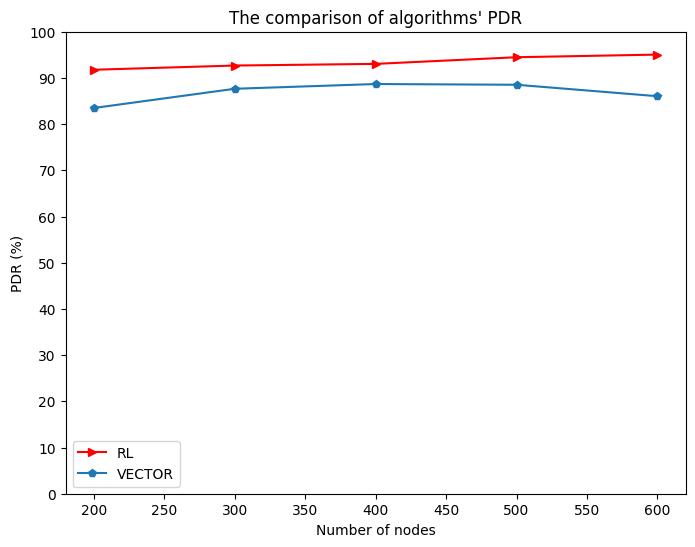

In [ ]:
# VẼ SƠ ĐỒ MÔ PHỎNG PDR(%)
import matplotlib.pyplot as plt
import csv

# Đọc dữ liệu từ file CSV
data = []
with open('pdr_comparison.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Tách dữ liệu thành các danh sách riêng biệt
nodes = []
rl = []
vector = []

for row in data:
    nodes.append(int(row['Number of nodes']))
    rl.append(float(row['RL']))
    vector.append(float(row['VECTOR']))

# Vẽ sơ đồ
plt.figure(figsize=(8, 6))
plt.plot(nodes, rl, 'r>-', label='RL')
plt.plot(nodes, vector, 'p-', label='VECTOR' )
plt.xlabel('Number of nodes')
plt.ylabel('PDR (%)')
plt.title('The comparison of algorithms\' PDR')
plt.legend()
plt.yticks(range(0, 101, 10))
plt.show()

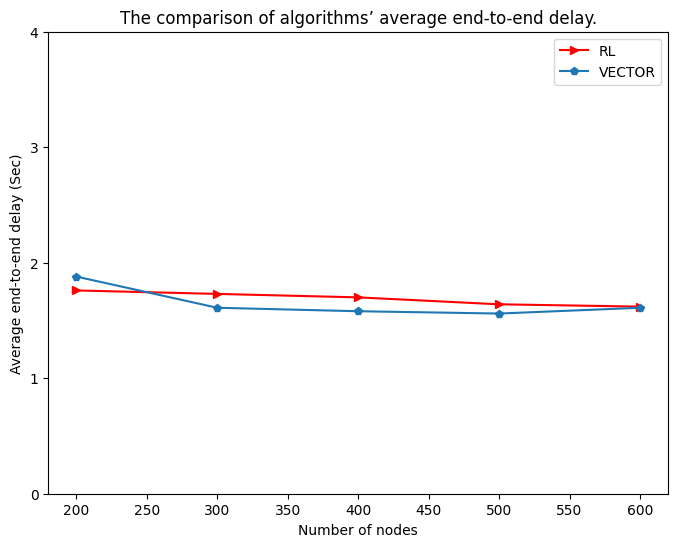

In [ ]:
# VẼ SƠ ĐỒ MÔ PHỎNG END-TO-END DELAY
import matplotlib.pyplot as plt
import csv

# Đọc dữ liệu từ file CSV
data = []
with open('avg_end_to_end_delay_comparison.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Tách dữ liệu thành các danh sách riêng biệt
nodes = []
rl = []
vector = []

for row in data:
    nodes.append(int(row['Number of nodes']))
    rl.append(float(row['RL']))
    vector.append(float(row['VECTOR']))

# Vẽ sơ đồ
plt.figure(figsize=(8, 6))
plt.plot(nodes, rl, 'r>-', label='RL')
plt.plot(nodes, vector, 'p-', label='VECTOR' )
plt.xlabel('Number of nodes')
plt.ylabel('Average end-to-end delay (Sec)')
plt.title('The comparison of algorithms’ average end-to-end delay.')
plt.legend()
plt.yticks(range(0, 5, 1))
plt.show()

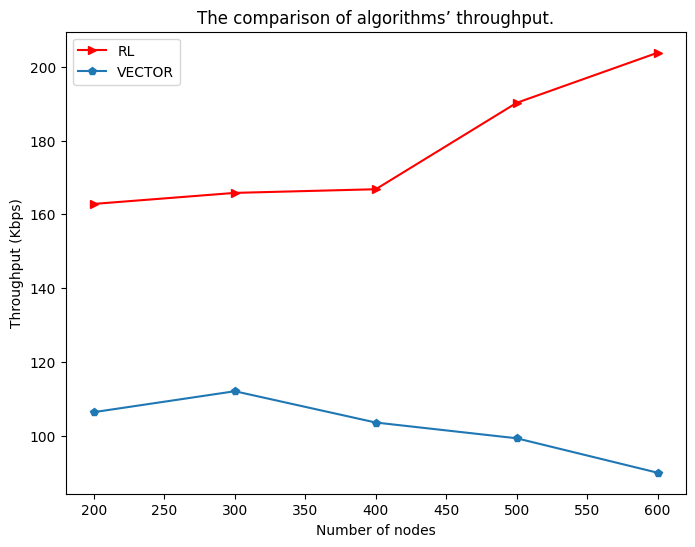

In [ ]:
# VẼ SƠ ĐỒ MÔ PHỎNG THROUGHPUT
import matplotlib.pyplot as plt
import csv

# Đọc dữ liệu từ file CSV
data = []
with open('throughput_comparison.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Tách dữ liệu thành các danh sách riêng biệt
nodes = []
rl = []
vector = []

for row in data:
    nodes.append(int(row['Number of nodes']))
    rl.append(float(row['RL']))
    vector.append(float(row['VECTOR']))

# Vẽ sơ đồ
plt.figure(figsize=(8, 6))
plt.plot(nodes, rl, 'r>-', label='RL')
plt.plot(nodes, vector, 'p-', label='VECTOR' )
plt.xlabel('Number of nodes')
plt.ylabel('Throughput (Kbps)')
plt.title('The comparison of algorithms’ throughput.')
plt.legend()
plt.show()

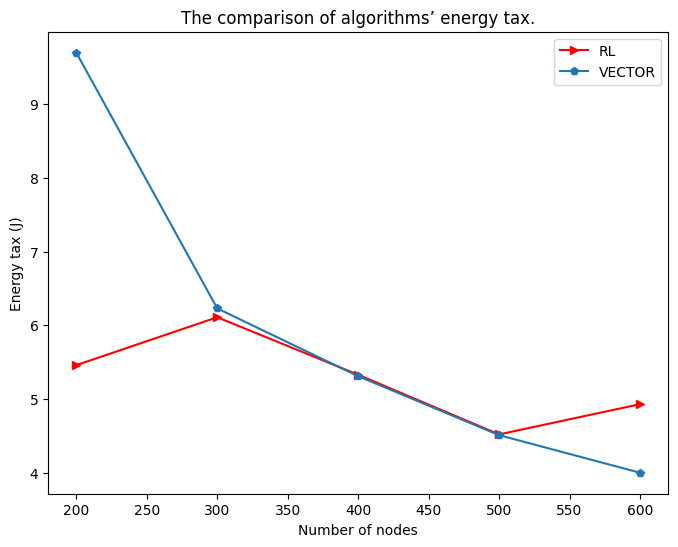

In [ ]:
# VẼ SƠ ĐỒ MÔ PHỎNG ENERGY TAX
import matplotlib.pyplot as plt
import csv

# Đọc dữ liệu từ file CSV
data = []
with open('energy_tax_comparison.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Tách dữ liệu thành các danh sách riêng biệt
nodes = []
rl = []
vector = []

for row in data:
    nodes.append(int(row['Number of nodes']))
    rl.append(float(row['RL']))
    vector.append(float(row['VECTOR']))

# Vẽ sơ đồ
plt.figure(figsize=(8, 6))
plt.plot(nodes, rl, 'r>-', label='RL')
plt.plot(nodes, vector, 'p-', label='VECTOR' )
plt.xlabel('Number of nodes')
plt.ylabel('Energy tax (J)')
plt.title('The comparison of algorithms’ energy tax.')
plt.legend()
plt.show()